In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [256]:
pd.set_option('display.max_columns', None)

In [257]:
df = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2celltrain.csv")
# holdout = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2cellholdout.csv")
# holdout set will not be used as it was not scored
df 

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [258]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [259]:
holdout_df = df.sample(frac=0.1, random_state=1973)
df = df.drop(holdout_df.index)

In [295]:
print(f'for test and training we have {len(df)} records and for holdout we have {len(holdout_df)} records, both data sets have {len(df.columns)} variables')

for test and training we have 45600 records and for holdout we have 5105 records, both data sets have 90 variables


In [260]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [261]:
df.shape

(45942, 58)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45942 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 45942 non-null  int64  
 1   Churn                      45942 non-null  int64  
 2   MonthlyRevenue             45800 non-null  float64
 3   MonthlyMinutes             45800 non-null  float64
 4   TotalRecurringCharge       45800 non-null  float64
 5   DirectorAssistedCalls      45800 non-null  float64
 6   OverageMinutes             45800 non-null  float64
 7   RoamingCalls               45800 non-null  float64
 8   PercChangeMinutes          45601 non-null  float64
 9   PercChangeRevenues         45601 non-null  float64
 10  DroppedCalls               45942 non-null  float64
 11  BlockedCalls               45942 non-null  float64
 12  UnansweredCalls            45942 non-null  float64
 13  CustomerCareCalls          45942 non-null  float64


In [263]:
df=df.set_index('CustomerID')

In [264]:
df.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,45942.000000,45800.000000,45800.000000,45800.000000,45800.000000,45800.000000,45800.000000,45601.000000,45601.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.000000,45941.000000,45941.000000,45941.000000,45128.000000,45128.000000,45942.000000,45942.000000,45942.000000,45942.000000,45942.00000
mean,0.288342,58.760489,525.619672,46.834367,0.893399,39.858581,1.248572,-11.802504,-1.217822,6.025652,4.090392,28.338118,1.874459,0.300422,114.652024,25.358759,8.210074,90.507122,67.626137,10.177848,0.012544,1.837008,18.763071,1.533521,1.355709,1.803465,1.556736,380.825820,31.384218,21.118264,0.037721,0.018567,0.051043,4.329807,0.05335
std,0.452996,44.224138,529.708504,23.910154,2.237364,95.699828,10.137729,257.898793,39.071114,9.058506,11.016929,38.779195,5.106556,1.189246,165.859194,34.999143,16.771509,104.988152,92.558897,15.610295,0.607545,5.605608,9.808999,1.258755,0.682363,1.322411,0.901232,254.302262,22.089635,23.924559,0.207268,0.142978,0.268391,3.136951,0.38275
min,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,33.660000,158.000000,30.000000,0.000000,0.000000,0.000000,-84.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.300000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,48.490000,367.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.900000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.00000
75%,1.000000,71.090000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.700000,7.700000,3.700000,36.700000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.300000,12.700000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,516.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.00000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,540.700000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,14.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,16.000000,9.000000,25.00000


In [265]:
df[df.columns[df.isna().sum() > 0]].isna().sum()

MonthlyRevenue           142
MonthlyMinutes           142
TotalRecurringCharge     142
DirectorAssistedCalls    142
OverageMinutes           142
RoamingCalls             142
PercChangeMinutes        341
PercChangeRevenues       341
ServiceArea               21
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   814
AgeHH2                   814
dtype: int64

In [266]:
df[df.columns[df.isna().sum() > 0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 45942 entries, 3000002 to 3399994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MonthlyRevenue         45800 non-null  float64
 1   MonthlyMinutes         45800 non-null  float64
 2   TotalRecurringCharge   45800 non-null  float64
 3   DirectorAssistedCalls  45800 non-null  float64
 4   OverageMinutes         45800 non-null  float64
 5   RoamingCalls           45800 non-null  float64
 6   PercChangeMinutes      45601 non-null  float64
 7   PercChangeRevenues     45601 non-null  float64
 8   ServiceArea            45921 non-null  object 
 9   Handsets               45941 non-null  float64
 10  HandsetModels          45941 non-null  float64
 11  CurrentEquipmentDays   45941 non-null  float64
 12  AgeHH1                 45128 non-null  float64
 13  AgeHH2                 45128 non-null  float64
dtypes: float64(13), object(1)
memory usage: 5.3+ MB


In [267]:
df[df['Handsets'].isna()]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3308798,0,76.98,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,1,MIAFTL954,NaN,NaN,NaN,0.0,0.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,2-High,Other,Other,Unknown


Where handsets is also Handsets models and current equipment days are nan. we will fill drop this observation

In [268]:
df=df.drop(index=df[df['Handsets'].isna()].index)

only serv area is caragorical with 24 NA's we will see this records

In [269]:
df[df['ServiceArea'].isna()]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3022406,1,53.01,461.0,30.0,1.49,28.0,0.0,223.0,29.0,6.0,1.7,38.7,0.0,1.3,64.3,6.0,1.3,86.7,60.3,7.7,0.0,0.7,32,1,1,NaN,2.0,2.0,272.0,36.0,0.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,5,No,0,30,No,3-Good,Other,Other,Yes
3047802,1,61.45,950.0,45.0,0.00,91.0,0.7,218.0,2.6,9.3,23.0,76.7,7.0,0.0,158.3,59.3,13.7,153.7,162.3,32.3,0.0,3.3,27,5,4,NaN,2.0,2.0,132.0,48.0,48.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,9,No,0,30,No,1-Highest,Rural,Professional,Yes
3073410,1,109.29,1000.0,60.0,4.95,135.0,0.0,520.0,79.9,6.3,28.3,10.0,0.0,0.3,301.9,69.0,15.0,106.0,132.7,34.7,0.0,2.7,23,3,3,NaN,1.0,1.0,696.0,52.0,48.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,No,Yes,Yes,Yes,0,0,No,Yes,0,9,No,0,Unknown,No,1-Highest,Town,Professional,Yes
3082514,0,76.52,441.0,73.0,0.25,22.0,6.0,-163.0,-34.3,15.7,3.3,22.7,1.3,0.3,59.0,13.0,0.0,80.7,46.7,19.0,0.0,1.0,26,1,1,NaN,2.0,1.0,445.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,4-Medium,Other,Other,Unknown
3100222,0,79.92,318.0,75.0,0.99,0.0,0.0,-112.0,-0.7,2.7,2.0,23.3,0.0,0.0,79.4,17.0,4.7,63.7,13.7,4.7,0.0,0.3,20,5,4,NaN,2.0,2.0,600.0,42.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,9,No,0,60,No,1-Highest,Other,Other,No
3101758,1,17.90,191.0,10.0,0.25,14.0,0.0,-63.0,-3.7,0.7,0.0,17.0,1.3,0.0,14.6,15.3,1.7,49.3,32.7,0.7,0.0,0.0,20,2,2,NaN,2.0,2.0,346.0,24.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,5,No,0,60,No,2-High,Other,Other,Unknown
3109742,1,68.75,635.0,42.0,0.00,85.0,0.0,-75.0,-41.0,3.3,5.0,24.0,2.7,0.0,95.0,50.7,18.7,134.3,94.7,8.3,0.0,1.7,19,1,1,NaN,1.0,1.0,588.0,50.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,5,No,0,Unknown,No,2-High,Rural,Other,Unknown
3126878,0,34.83,297.0,30.0,0.00,13.0,0.1,86.0,13.0,1.3,0.0,10.0,0.0,0.0,49.3,6.7,0.0,80.7,7.7,1.3,0.0,0.3,19,1,1,NaN,2.0,1.0,204.0,44.0,40.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,6,No,0,60,No,2-High,Suburban,Professional,Yes
3128014,0,30.27,28.0,30.0,0.00,0.0,0.0,-22.0,-0.3,0.7,0.7,2.3,0.0,0.0,0.1,0.7,0.0,6.0,4.3,1.3,0.0,0.0,19,2,2,NaN,1.0,1.0,566.0,54.0,50.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,7,No,0,Unknown,No,3-Good,Other,Retired,Yes


data is ok so service area will be replaced with 'unknown' because its still an information

In [270]:
df['ServiceArea']=df['ServiceArea'].fillna('Unknown')

In [271]:
df[df['AgeHH1'].isna() & df['AgeHH2'].isna()].shape[0]

814

AGEHH1 and AGEHH2 are always NA at the same time. Only 909 cases so we will imput it with mean

In [272]:
df['AgeHH1']=df['AgeHH1'].fillna(df['AgeHH1'].mean())
df['AgeHH2']=df['AgeHH2'].fillna(df['AgeHH2'].mean())

In [273]:
def count_zeros(df):
    """
    This function counts the number of zeros in each numeric column of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series containing the count of zeros for each numeric column.
    """
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[int, float])
    
    # Count zeros in each numeric column
    zero_counts = (numeric_cols == 0).sum()
    
    return zero_counts

we will check for 0 values amount in the data 

In [274]:
count_zeros(df)

Churn                        32694
MonthlyRevenue                   4
MonthlyMinutes                 652
TotalRecurringCharge           150
DirectorAssistedCalls        22141
OverageMinutes               20848
RoamingCalls                 31429
PercChangeMinutes             1010
PercChangeRevenues            5259
DroppedCalls                  6943
BlockedCalls                 12468
UnansweredCalls               4480
CustomerCareCalls            25185
ThreewayCalls                33402
ReceivedCalls                 5698
OutboundCalls                 5795
InboundCalls                 13504
PeakCallsInOut                3798
OffPeakCallsInOut             4098
DroppedBlockedCalls           5196
CallForwardingCalls          45726
CallWaitingCalls             22494
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                      34
Handsets                         0
HandsetModels                    0
CurrentEquipmentDays            19
AgeHH1              

AgeHH1 and AgeHH2 cols dropeed because of unnatural amount of zeros as the value stands for age

In [275]:
df=df.drop(columns=['AgeHH1','AgeHH2'])

In [276]:
df[df.columns[df.isna().sum() > 0]].isna().sum()

MonthlyRevenue           142
MonthlyMinutes           142
TotalRecurringCharge     142
DirectorAssistedCalls    142
OverageMinutes           142
RoamingCalls             142
PercChangeMinutes        341
PercChangeRevenues       341
dtype: int64

use knn imputer to imput missing values for the rest of columns

In [277]:
def find_optimal_k(df, max_k=10):
    """
    Use the elbow method to find the optimal number of clusters (k) for k-means clustering.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    max_k (int): The maximum number of clusters to try.

    Returns:
    int: The optimal number of clusters.
    """
    # Ensure the DataFrame is numeric
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Fill missing values with column means temporarily for clustering
    imputer = SimpleImputer(strategy='mean')
    temp_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    
    # Calculate inertia for different values of k
    inertia = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(temp_df)
        inertia.append(kmeans.inertia_)
    
    # Plot the inertia
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bo-', markersize=8)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    # Identify the elbow point
    # This is a simple heuristic; more advanced methods can be used for better results.
    optimal_k = np.argmax(np.diff(inertia)) + 1
    return optimal_k

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

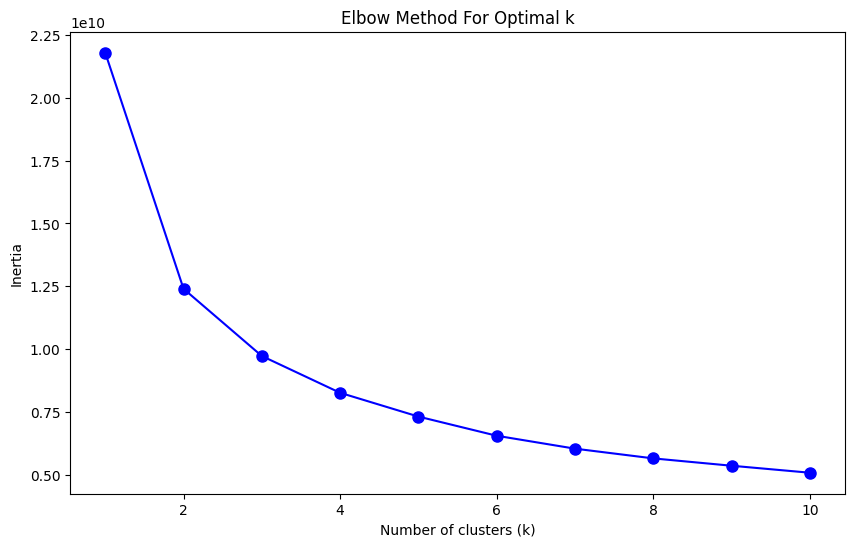

9

In [278]:
find_optimal_k(df)

In [279]:
def kmeans_impute(df, k):
    """
    Impute missing values in a DataFrame using k-means clustering.

    Parameters:
    df (pd.DataFrame): The input DataFrame with missing values.
    k (int): The number of clusters for k-means.

    Returns:
    pd.DataFrame: The DataFrame with missing values imputed.
    """
    # Ensure the DataFrame is numeric
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Fill missing values with column means temporarily for clustering
    imputer = SimpleImputer(strategy='mean')
    temp_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(temp_df)
    temp_df['Cluster'] = clusters
    
    # Impute missing values based on cluster means
    for col in numeric_df.columns:
        for cluster in range(k):
            cluster_mean = temp_df[temp_df['Cluster'] == cluster][col].mean()
            df.loc[(temp_df['Cluster'] == cluster) & (df[col].isna()), col] = cluster_mean

    return df

using elbow method i will use k of 4

In [280]:
df=kmeans_impute(df,4)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [281]:
df[df.columns[df.isna().sum() > 0]].isna().sum()

MonthlyRevenue           142
MonthlyMinutes           142
TotalRecurringCharge     142
DirectorAssistedCalls    142
OverageMinutes           142
RoamingCalls             142
PercChangeMinutes        341
PercChangeRevenues       341
dtype: int64

In [282]:
df[df['MonthlyRevenue'].isna()]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000898,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,2.0,2.0,DETTOL419,3.0,2.0,902.0,No,Yes,No,No,No,Known,No,Yes,No,No,No,Yes,0.0,0.0,No,Yes,0.0,5.0,No,0.0,30,No,1-Highest,Other,Other,No
3000926,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,KCYKCM816,2.0,1.0,4.0,No,No,No,No,No,Unknown,Yes,Yes,No,No,No,No,0.0,0.0,No,Yes,0.0,1.0,No,0.0,30,No,1-Highest,Town,Other,Unknown
3007326,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,2.0,2.0,DALFTW817,5.0,3.0,817.0,Yes,No,Yes,Yes,No,Known,No,No,No,No,No,Yes,0.0,0.0,No,Yes,0.0,4.0,No,0.0,60,No,3-Good,Other,Self,Yes
3011438,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,3.0,2.0,SANSAN210,2.0,1.0,1245.0,Yes,No,No,Yes,No,Known,No,No,No,No,No,No,0.0,0.0,Yes,No,0.0,5.0,No,1.0,30,No,1-Highest,Other,Other,Yes
3017394,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0,2.0,HARHAR860,1.0,1.0,1196.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,Yes,No,0.0,6.0,No,0.0,Unknown,No,5-Low,Suburban,Other,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399910,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,0.7,17.0,1.0,2.3,33.6,5.3,0.0,58.3,16.7,4.3,0.0,0.0,28.0,1.0,1.0,LAXRIV909,2.0,2.0,282.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0.0,0.0,No,No,0.0,7.0,No,0.0,30,No,1-Highest,Suburban,Other,Unknown
3399958,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29.0,1.0,1.0,LAXSFN818,2.0,2.0,526.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,No,No,0.0,6.0,No,0.0,60,No,1-Highest,Suburban,Other,Yes
3399978,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25.0,1.0,1.0,LAXCDG310,3.0,2.0,378.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0.0,0.0,No,No,0.0,7.0,No,1.0,80,No,5-Low,Other,Clerical,No


there is just 1 bad quality observation left, we will drop it

In [283]:
df=df.dropna()

## Exploratory analysis

In [284]:
df.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.00000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000
mean,0.286162,58.817562,526.496974,46.921952,0.895349,39.878838,1.247121,-11.802763,-1.217849,6.041294,4.108583,28.432559,1.881636,0.301211,115.035969,25.435934,8.242568,90.786480,67.841191,10.211936,0.012638,1.844461,18.704320,1.532719,1.355197,1.802785,1.556645,379.42500,0.035877,0.018509,0.051140,4.330154,0.052961
std,0.451971,44.224200,529.911486,23.883363,2.241284,95.790189,10.136087,257.901615,39.071542,9.059836,11.041360,38.828182,5.119972,1.190583,166.021472,34.985450,16.805997,104.924654,92.606633,15.627947,0.609818,5.621825,9.754706,1.261428,0.682911,1.321526,0.901370,252.45571,0.202254,0.142841,0.268802,3.135718,0.381515
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-84.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.600000,3.300000,0.000000,23.300000,11.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,48.580000,368.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,53.400000,13.700000,2.000000,62.300000,36.000000,5.700000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.00000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,1.000000,71.112500,724.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.700000,7.700000,3.700000,36.700000,1.700000,0.300000,154.100000,34.000000,9.300000,121.700000,88.700000,12.700000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,514.00000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,540.700000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,14.000000,1812.00000,4.000000,3.000000,16.000000,9.000000,25.000000


In [285]:
df['Churn'].value_counts()/df['Churn'].count()

Churn
0.0    0.713838
1.0    0.286162
Name: count, dtype: float64

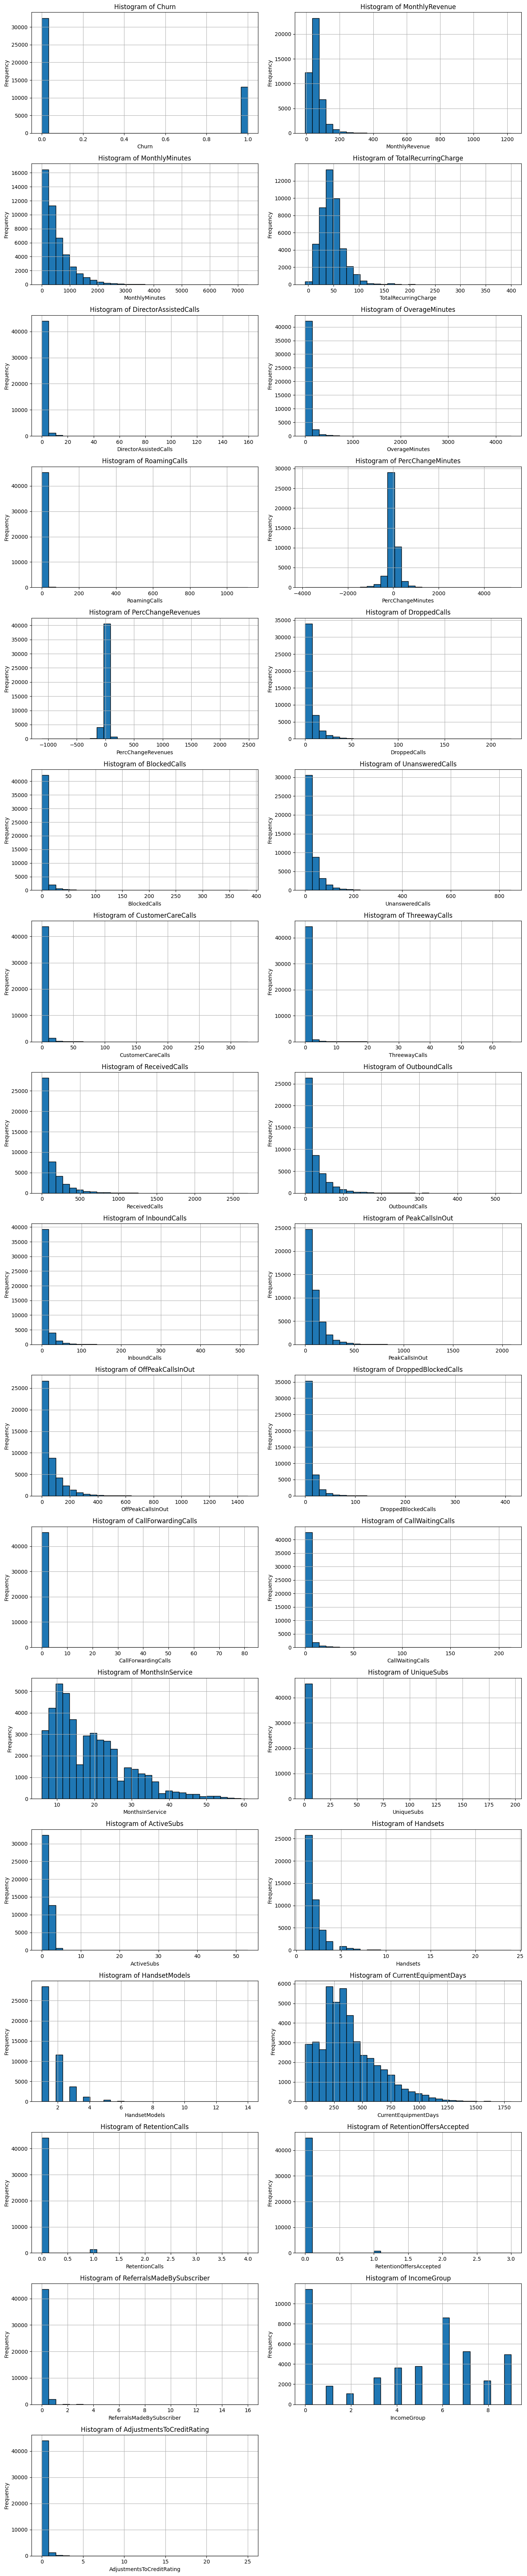

In [286]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up the figure and axes for 2 columns
num_cols = 2
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    df[col].plot(kind='hist', bins=30, edgecolor='black', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

IncomeGroup is categorical column, shouldnt be analyzed here

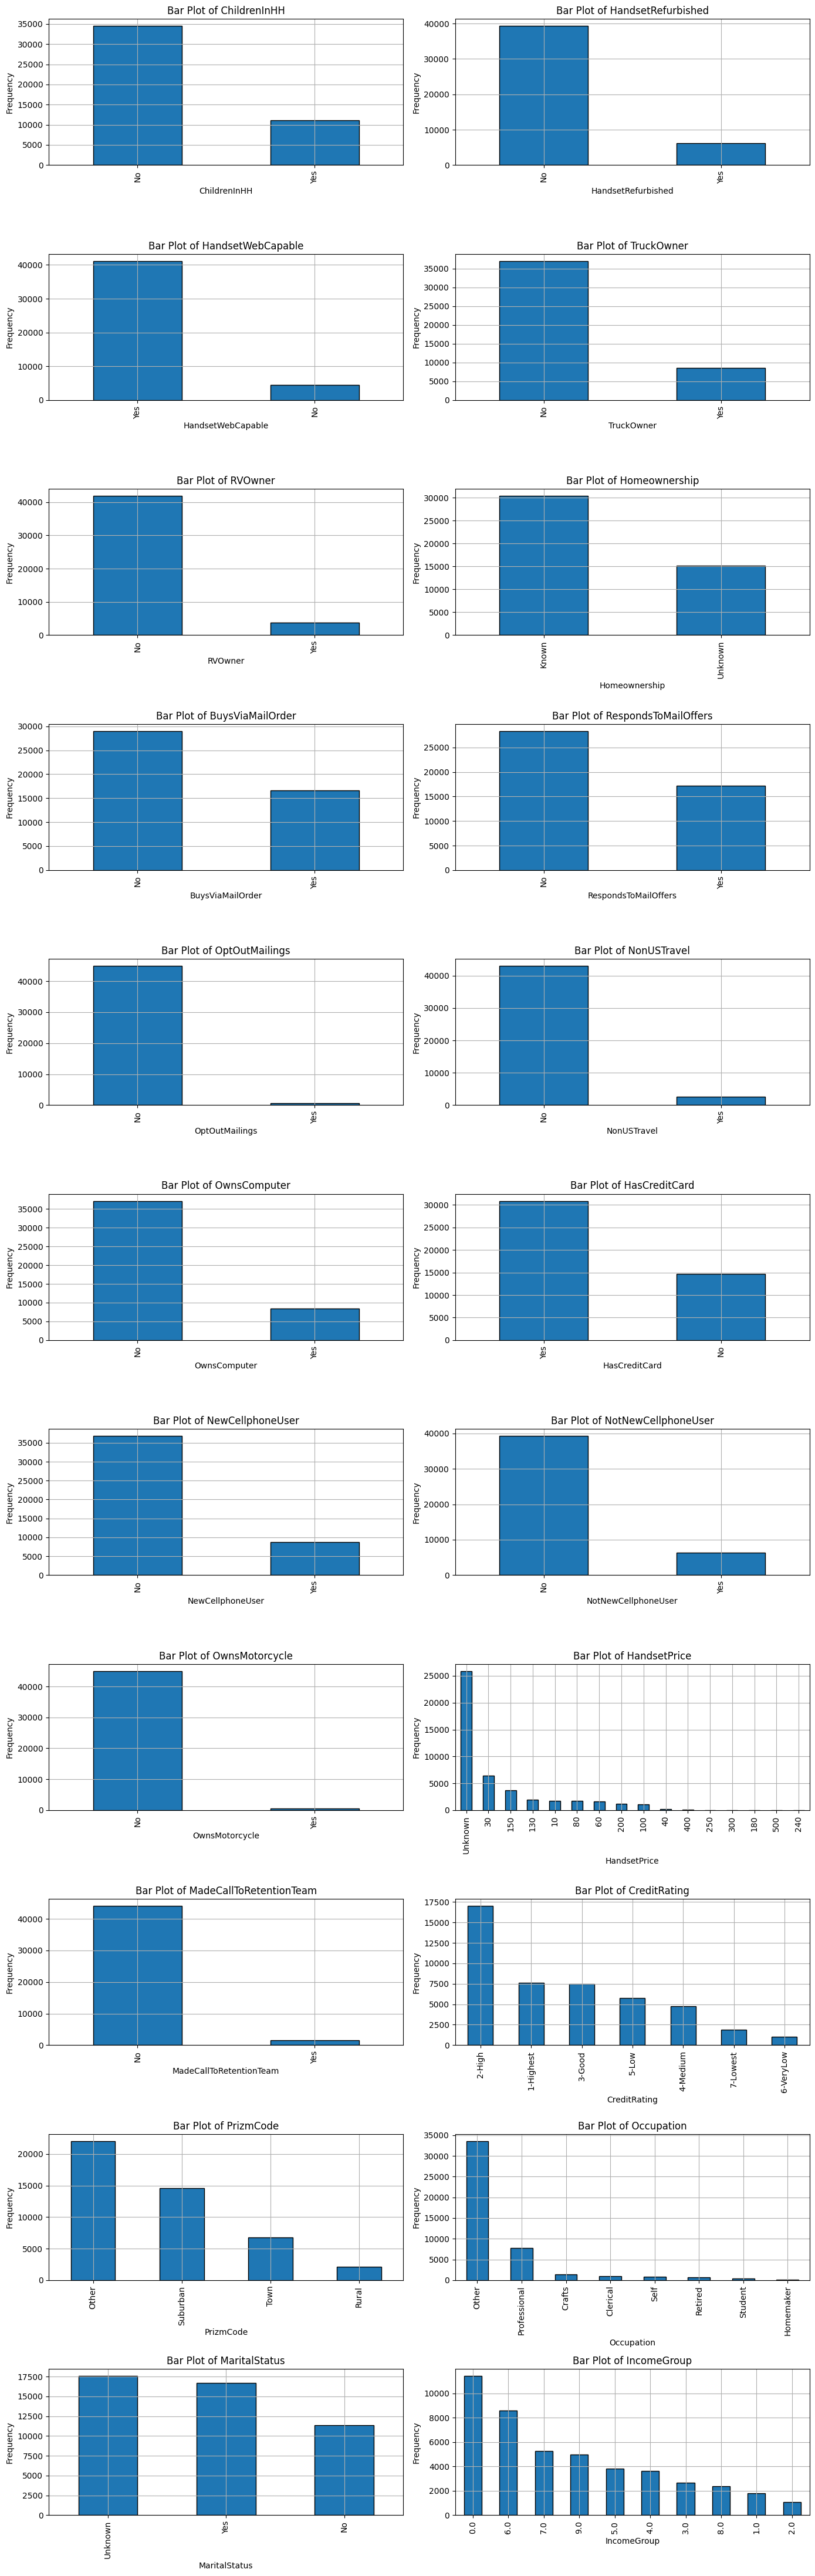

In [287]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('ServiceArea')

# Add 'IncomeGroup' to the list of categorical columns if it's not already included
if 'IncomeGroup' not in categorical_cols:
    categorical_cols.append('IncomeGroup')

# Set up the figure and axes for 2 columns
num_cols = 2
num_plots = len(categorical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'Bar Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [288]:
df=df.drop(columns='ServiceArea')

In [289]:
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000002,1.0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61.0,2.0,1.0,2.0,2.0,361.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1.0,0.0,No,No,0.0,4.0,No,0.0,30,Yes,1-Highest,Suburban,Professional,No
3000010,1.0,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58.0,1.0,1.0,2.0,1.0,1504.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0.0,0.0,Yes,No,0.0,5.0,No,0.0,30,No,4-Medium,Suburban,Professional,Yes
3000014,0.0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1812.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0.0,0.0,Yes,No,0.0,6.0,No,0.0,Unknown,No,3-Good,Town,Crafts,Yes
3000022,0.0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59.0,2.0,2.0,9.0,4.0,458.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,Yes,No,0.0,6.0,No,0.0,10,No,4-Medium,Other,Other,No
3000026,1.0,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,2.0,4.0,3.0,852.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0.0,0.0,No,Yes,0.0,9.0,No,1.0,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399882,1.0,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,12.3,2.3,22.7,1.3,0.0,99.0,23.0,3.7,135.7,112.3,14.7,0.0,1.3,35.0,2.0,2.0,1.0,1.0,945.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,No,No,0.0,6.0,No,0.0,Unknown,No,1-Highest,Other,Professional,No
3399906,0.0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30.0,1.0,1.0,1.0,1.0,883.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,No,No,0.0,3.0,No,0.0,Unknown,No,3-Good,Other,Other,Yes
3399942,0.0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30.0,1.0,1.0,1.0,1.0,882.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,No,No,0.0,7.0,No,0.0,Unknown,No,1-Highest,Other,Professional,Unknown


In [292]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [299]:
most_correlated.sort_values

<bound method Series.sort_values of CreditRating_3-Good            0.020754
CreditRating_2-High            0.023228
MaritalStatus_Unknown          0.023602
HandsetPrice_Unknown           0.030993
HandsetRefurbished_Yes         0.032710
RetentionOffersAccepted        0.033113
UniqueSubs                     0.033524
RetentionCalls                 0.058258
MadeCallToRetentionTeam_Yes    0.060830
CurrentEquipmentDays           0.103413
Name: Churn, dtype: float64>

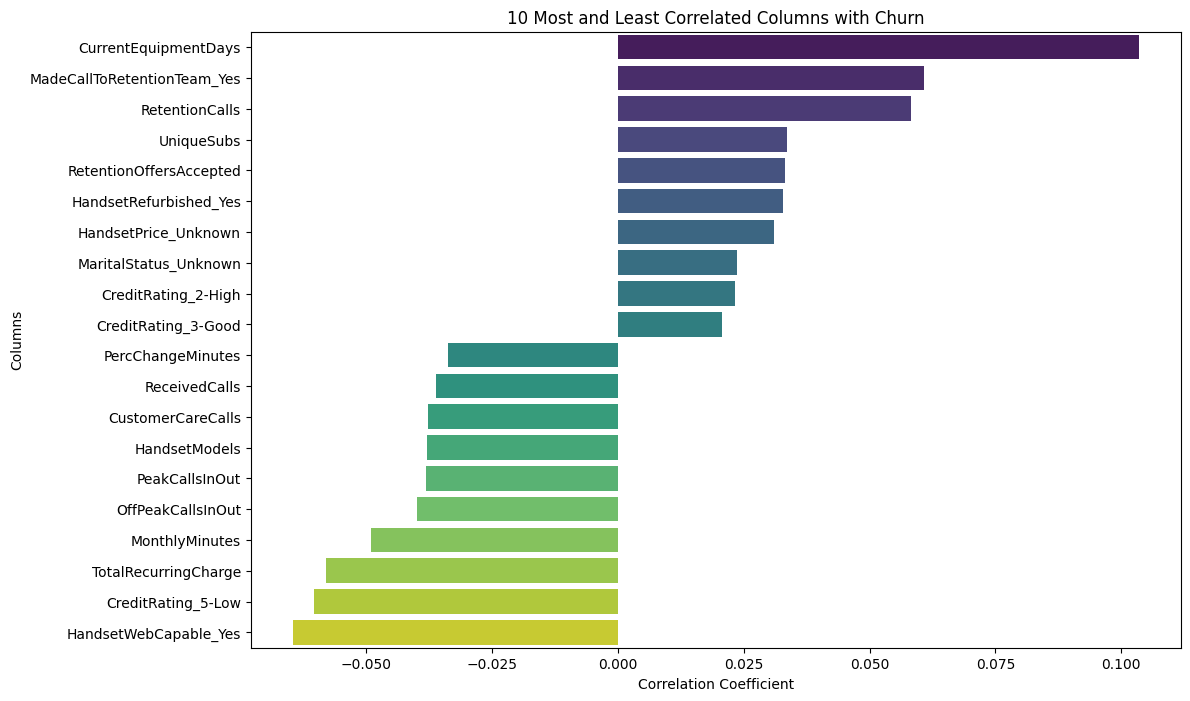

In [304]:
import seaborn as sns

correlation_matrix = df.corr()
churn_correlation = correlation_matrix['Churn'].sort_values()
most_correlated = churn_correlation.tail(11).head(10)  # Exclude the 'Churn' correlation with itself
least_correlated = churn_correlation.head(10)
combined_correlations = pd.concat([most_correlated, least_correlated]).sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=combined_correlations.values, y=combined_correlations.index, palette='viridis')
plt.title('10 Most and Least Correlated Columns with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()

## modeling

How can we improve model? Depends what we aim for?

1. define the problem
1. Here choose a model metric we will be looking to optimise based on market reports and current tactics (google!)

1. EDA and approach to data cleaning manipulation
1. train test split target VAR description

1. Create base LR model to see how it performs
2. See how good can you make LR model by tuning hyperparameters training by using KFOLD / resampling train test and so on
    - we will have lots and lots of variables so using lasso/ ridge could turn out good explain them and see which parameter does the trick
    - adding variable combinations if possible and they make sense as a one way to improve a model
    - outline the advantages of LR such as interpretability of results coefficients and so on

3. ML Methods bagging XGB RandomForest
    - tweaking them by randomgridsearch/ gridsearch
    - train/test rebalancing by undersampling oversampling/ smooten
    - same methods as above 


#### LEVERAGE LIFT USE XD BECAUSE IT SOUNDS WELL

4. Neural network maybe? Idk about the volume of Prior work
5. Sum up the work which model performed better and so on. State that its dependent in use case and recommend using one based on this paper in this case and current trends.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_columns', None)

## Baseline model

In [ ]:
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1973)

In [ ]:
def evaluate_model(y_pred, y_test,ret_df=False,name='model_name'):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"""model Performance: 
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    """)
    
    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1]
        }
        return pd.DataFrame(metrics)

Model Performance: 
    Accuracy = 61.833%
    Recall = 31.221%
    Precision = 32.468%
    F1 Score = 31.832%
    
None and 1
Model Performance: 
    Accuracy = 69.539%
    Recall = 10.983%
    Precision = 38.286%
    F1 Score = 17.07%
    
None and 2
Model Performance: 
    Accuracy = 66.064%
    Recall = 24.501%
    Precision = 36.086%
    F1 Score = 29.186%
    
None and 3
Model Performance: 
    Accuracy = 70.01%
    Recall = 11.252%
    Precision = 40.808%
    F1 Score = 17.64%
    
None and 4
Model Performance: 
    Accuracy = 67.796%
    Recall = 19.585%
    Precision = 37.666%
    F1 Score = 25.771%
    
None and 5
Model Performance: 
    Accuracy = 70.054%
    Recall = 10.33%
    Precision = 40.39%
    F1 Score = 16.453%
    
None and 6
Model Performance: 
    Accuracy = 68.969%
    Recall = 16.705%
    Precision = 39.654%
    F1 Score = 23.507%
    
None and 7
Model Performance: 
    Accuracy = 70.24%
    Recall = 9.562%
    Precision = 40.887%
    F1 Score = 15.5%
    
None

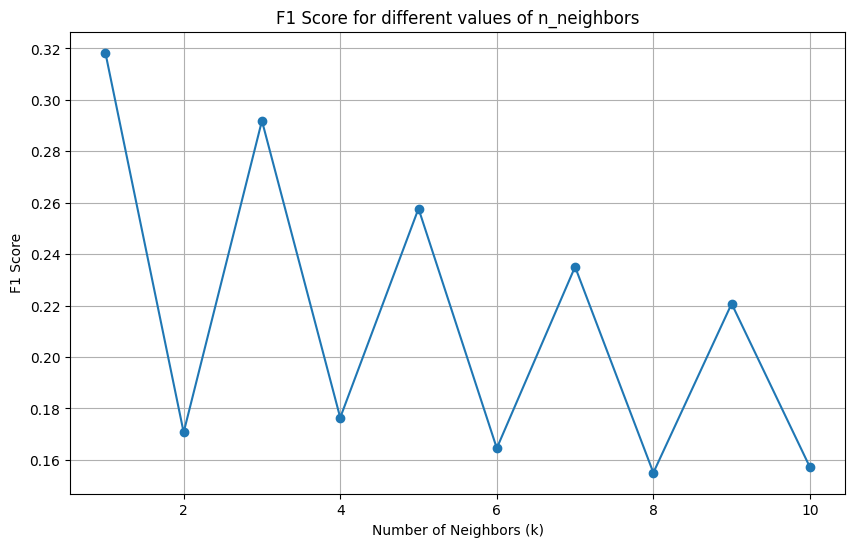

In [ ]:
n_neighbors_range = range(1, 11)

# List to store the F1 scores for different n_neighbors
f1_scores = []

for k in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)  # Adjust 'average' as needed
    f1_scores.append(f1)
    print(f"{evaluate_model(y_pred,y_test)} and {k}")


# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, f1_scores, marker='o')
plt.title('F1 Score for different values of n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [ ]:
y_pred_t = np.ones_like(y_test)

In [ ]:
evaluate_model(y_pred_t,y_test)

Model Performance: 
    Accuracy = 28.543%
    Recall = 100.0%
    Precision = 28.543%
    F1 Score = 44.41%
    


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
results=evaluate_model(y_pred,y_test,ret_df=True,name='baseline_kmeans')

Model Performance: 
    Accuracy = 61.833%
    Recall = 31.221%
    Precision = 32.468%
    F1 Score = 31.832%
    


## Linear Regrssion model

In [311]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [312]:
evaluate_model(y_pred, y_test, name='Logistic Regression', ret_df=False)

Model Performance: 
    Accuracy = 71.259%
    Recall = 0.461%
    Precision = 28.571%
    F1 Score = 0.907%
    


In [315]:
proba=model_lr.predict_proba(X_test)

In [328]:

def test_thresh(x):
    threshold_value=[]
    scores_acc=[]
    scores_f1=[]
    scores_rec=[]
    scores_prec=[]
    for i in np.linspace(0, 1, 101):
        threshold = i  # You can adjust the threshold as needed
        y_pred_fun = (x[:, 1] > threshold).astype(int)
        threshold_value.append(i)
        scores_acc.append(accuracy_score(y_test, y_pred_fun))
        scores_f1.append(f1_score(y_test, y_pred_fun))
        scores_rec.append(recall_score(y_test, y_pred_fun))
        scores_prec.append(precision_score(y_test, y_pred_fun))
        #scores_roc.append(roc_auc_score(y_test, y_prob))
    return pd.DataFrame({'threshold_value':threshold_value,'score_acc':scores_acc,'score_f1':scores_f1,'score_rec':scores_rec,'score_prec':scores_prec}).set_index('threshold_value')

In [329]:
test_thresh(proba)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

,score_acc,score_f1,score_rec,score_prec
threshold_value,,,,
0.00,0.285432,0.444103,1.000000,0.285432
0.01,0.285432,0.444103,1.000000,0.285432
0.02,0.285542,0.444141,1.000000,0.285464
0.03,0.285542,0.444141,1.000000,0.285464
0.04,0.285542,0.444046,0.999616,0.285417
...,...,...,...,...
0.96,0.714458,0.000000,0.000000,0.000000
0.97,0.714458,0.000000,0.000000,0.000000
0.98,0.714568,0.000000,0.000000,0.000000


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

<Axes: xlabel='threshold_value'>

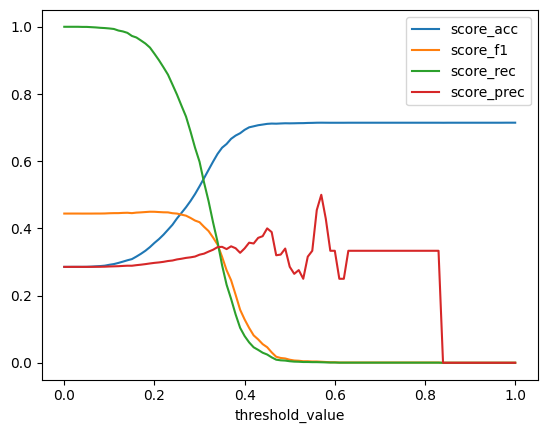

In [330]:
test_thresh(proba).plot()